In [1]:
import math
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def my_pgcd(a,b):
    """
        Calcule le pgcd de a et b
    """
    while b != 0:
        a,b = b,a%b
    return a

In [3]:
def my_inverse(a,N):
    """
        Retourne l'inverse de a modulo N s'il existe
    """
    for b in range(1,N):
        if a*b%N == 1:
            return b
    #print(a,"n'a pas d'inverse modulo",N)
    return None

In [4]:
print(my_pgcd(2,4))

2


In [5]:
print(my_inverse(42,2017))

1969


In [6]:
def calculer_temps_my_pgcd(a,b):
    """
        Calcule le temps d'exécution de la fonction my_pgcd pour deux entiers a et b donnés 
    """
    tdebut = time.clock()
    my_pgcd(a,b)
    tfin = time.clock()
    return tfin - tdebut

In [7]:
def tracer_courbe_my_pgcd():
    """
        Trace une courbe du temps d'exécution de la fonction my_pgcd en fonction de a et b
    """
    N = []
    t = []
    for i in range(0,100000,100):
        N.append(i)
        a,b = i+random.randint(1,100),i
        temps = calculer_temps_my_pgcd(a,b)
        t.append(temps)
    return N,t

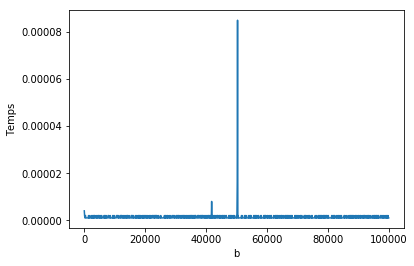

In [1261]:
N,t = tracer_courbe_my_pgcd()
for i in range(len(t)):
    if t[i]>sum(t)/len(t)+0.0001:
        t[i] = sum(t)/len(t)
plt.plot(N,t)
plt.xlabel('b')
plt.ylabel('Temps')
plt.show()

In [8]:
def calculer_temps_my_inverse(a,N):
    """
        Calcule le temps d'exécution de la fonction my_inverse pour deux entiers a et N donnés 
    """
    tdebut = time.clock()
    my_inverse(a,N)
    tfin = time.clock()
    return tfin-tdebut

In [33]:
def tracer_courbe_my_inverse(a):
    """
        Trace une courbe du temps d'exécution de la fonction my_inverse en fonction de N 
    """
    N = []
    t = []
    for i in range(0,1000000,1000):
        N.append(i)
        t.append(calculer_temps_my_inverse(a,i))
    return N,t

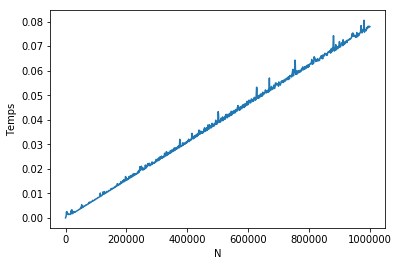

In [34]:
N,t = tracer_courbe_my_inverse(4)
plt.plot(N,t)
plt.xlabel('N')
plt.ylabel('Temps')
plt.show()

In [9]:
def binaire(n):
    """
        Convertit l'entier n en nombre binaire (écrit sous forme de tableau)
    """
    tab=[]
    while n!=0:
        tab.append(n%2)
        n=n//2
    return tab

def my_expo_mod(g,n,N):
    """
        Calcule g^n mod N à l'aide d'une méthode d'exponentiation discrète
    """
    h = 1
    a = binaire(n)
    l = len(a)
    for i in range(l-1,-1,-1):
        h = h*h%N
        if a[i] == 1:
            h = (h*g)%N
    return h

In [10]:
g = 2
n = 3
N = 3
print(my_expo_mod(g,n,N))

2


In [11]:
def first_test(N):
    """
        Test naïf de primalité sur un entier N
        
        Retourne True si N est premier, False sinon
    """
    for i in range(2,math.floor(math.sqrt(N))+1):
        if N%i == 0:
            return False
    return True

In [17]:
print(first_test(4))

False


In [18]:
def nb_premiers_inf_a(n):
    """
        Énumère les nombres premiers inférieurs à n
    """
    c = 0
    for i in range(2,n):
        if first_test(i):
            c += 1
    return c

In [19]:
nb_premiers_inf_a(10**5)

9592

In [20]:
def facteurs_premiers(n):
    """
        Donne la liste des facteurs premiers de l'entier n
    """
    l = []
    for i in range(2,n):
        if first_test(i) and n%i == 0:
            l.append(i)
    return l

def carmichael(n):
    """
        Retourne True si n est un nombre de Carmichael, False sinon
    """
    if n%2 == 0:
        return False #car les nombres de Carmichael sont impairs
    if first_test(n):
        return False #car les nombres de Carmichael sont composés
    lfp = facteurs_premiers(n)
    if len(lfp) != len(set(lfp)):
        return False #car les nombres de Carmichael n'ont pas de facteurs carrés
    if len(set(lfp)) <3:
        return False #car les nombres de Carmichael sont le produit d'au moins 3 nombres premiers différents
    for p in lfp:
        if (n-1)%(p-1):
            return False
    lpn = [a for a in range(2,n) if my_pgcd(a,n) == 1] #liste des entiers premiers avec n
    for a in lpn:
        if my_expo_mod(a,n-1,n) != 1:
            return False
    return True

In [21]:
carmichael(561)

True

In [22]:
def gen_carmichael_inf_a(N):
    """
        Liste les nombres de Carmichael inférieurs à N
    """
    l = []
    for i in range(1,N,2):
        if carmichael(i):
            print(i)
            l.append(i)
    return l

In [289]:
gen_carmichael_inf_a(10**5)

561
1105
1729
2465
2821
6601
8911
10585
15841
29341
41041
46657
52633
62745
63973
75361


[561,
 1105,
 1729,
 2465,
 2821,
 6601,
 8911,
 10585,
 15841,
 29341,
 41041,
 46657,
 52633,
 62745,
 63973,
 75361]

In [896]:
def gen_carmichael(a,b):
    """
        Génère un nombre de Carmichael de la forme n = p*q*r avec p,q et r trois nombres premiers compris entre a et b
    """
    while True: 
        p = random.randint(a,b)
        while not first_test(p):
            p = random.randint(a,b)
        q = random.randint(a,b)
        while not first_test(q):
            q = random.randint(a,b)
        r = random.randint(a,b)
        while not first_test(r):
            r = random.randint(a,b)
        n = p*q*r
        if carmichael(n):
            l = sorted([p,q,r])
            print(n,"=",l[0],"x",l[1],"x",l[2],"\n")
            return n

In [318]:
gen_carmichael(1,100)

15841 = 7 x 31 x 73 

15841


In [333]:
gen_carmichael(35,200)

294409 = 37 x 73 x 109 



294409

In [330]:
def gen_carmichael_p_fixe(p,a,b):
    """
        Génère un nombre de Carmichael de la forme n = p*q*r avec p,q et r trois nombres premiers compris entre a et b et p fixé
    """
    c = []
    lp = [] #liste des nombres premiers compris entre a et b
    for i in range(a,b+1,2):
        if first_test(i):
            lp.append(i)
    for i in range(len(lp)):
         for j in range(i+1,len(lp)):
                q = lp[i]
                r = lp[j]
                n = p*q*r
                if carmichael(n):
                    l = sorted([p,q,r])
                    print(n,"=",l[0],"x",l[1],"x",l[2],"\n")
                    c.append(n)
    return c

In [331]:
gen_carmichael_p_fixe(3,1,20)

561 = 3 x 11 x 17 



[561]

In [332]:
gen_carmichael_p_fixe(5,1,100)

1105 = 5 x 13 x 17 

2465 = 5 x 17 x 29 

10585 = 5 x 29 x 73 



[1105, 2465, 10585]

In [23]:
def test_fermat(N):
    """
        Test de primalité de Fermat
        
        Retourne False si N est un nombre composé, True s'il est possiblement premier
    """
    a = random.randint(2,N-1)
    b = my_expo_mod(a,N,N)
    if (b-a)%N:
        return False
    return True

In [367]:
def gen_compose(a,b):
    """
        Génère un nombre composé compris entre a et b
    """
    while True:
        N = random.randint(a,b)
        if not test_fermat(N):
            return N

In [378]:
n = gen_carmichael(3,75)
print(test_fermat(n))
print(first_test(n))

1729 = 7 x 13 x 19 

True
False


In [376]:
n = gen_compose(1,10**5)
print(n)
print(test_fermat(n))
print(first_test(n))

1161
False
False


In [388]:
def proba_erreur_test_fermat(n):
    """
        Calcule la probabilité d'erreur de test_fermat pour des entiers inférieurs à 10⁵
    """
    p = 0
    for i in range(n):
        r = random.random()
        if r < 0.33:
            N = gen_carmichael(3,30)
        elif 0.33 <= r < 0.66:
            N = gen_compose(1,10**5)
        else:
            N = random.randint(0,10**5)
        if test_fermat(N) and not first_test(N):
            p += 1
    return p/n

In [395]:
proba_erreur_test_fermat(100)

0.31

In [ ]:
def test_miller_rabin(n,T):
    """
        Test de primalité de Miller-Rabin
        
        Retourne False si N est un nombre composé, True s'il est probablement premier
    """
    h = 1
    while 2**h <= n-1 and (n-1)%(2**h):
        h += 1
    h = h-1
    m = (n-1)/(2**h)
    if n != 1 + (2**h)*m:
        return False 
    for i in range(1,T):
        a = random.randint(2,n-2)
        b = my_expo_mod(a,m,n)
        if b != 1 and b != (n-1):
            for j in range(1,h-1):
                if my_expo_mod(b,2,n) == 1:
                    return False
                b = my_expo_mod(b,2,n)
            if b != (n-1):
                return False
    return True

In [679]:
n = gen_carmichael(3,30)
print(n)
print(test_miller_rabin(n,100))
print(first_test(n))

561
False
False


In [680]:
n = gen_compose(1,10**5)
print(n)
print(test_fermat(n))
print(first_test(n))

29162
False
False


In [673]:
def proba_erreur_test_miller_rabin(n,T):
    """
        Calcule la probabilité d'erreur de test_miller_rabin pour des entiers inférieurs à 10⁵
    """
    p = 0
    for i in range(n):
        r = random.random()
        if r < 0.33:
            N = gen_carmichael(3,30)
        elif 0.33 <= r < 0.66:
            N = gen_compose(1,10**5)
        else:
            N = random.randint(0,10**5)
        if test_miller_rabin(N,T) and not first_test(N):
            p += 1
    return p/n

In [893]:
proba_erreur_test_miller_rabin(100,100)

0.23

In [809]:
def gen_rsa(t):
    """
        Génère des nombres probablement premiers (semi-premiers)
    """
    while True:
        p = random.randint(pow(2,t-1),pow(2,t))
        q = random.randint(pow(2,t-1),pow(2,t))
        if test_miller_rabin(p,t) and test_miller_rabin(q,t):
            return p*q

In [892]:
gen_rsa(10)

475978